In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import csv
import patsy

%matplotlib inline
import matplotlib as plt
plt.style.use('fivethirtyeight')


In [4]:
filepath0 = "/Users/anniebarry/DSI-SF-6/Capstone/The_Future_of_Employment_v0.csv"
future_csv = pd.read_csv(filepath0)
future = pd.DataFrame(future_csv)

In [5]:
filepath1 = "/Users/anniebarry/DSI-SF-6/Capstone/2014_Projections.csv"
projections_csv = pd.read_csv(filepath1)
projections = pd.DataFrame(projections_csv)

In [6]:
projections.rename(columns={'Column1' : 'SOC_code', 
                            '2014_National_Employment_Matrix_Title' : 'Job_title',
                            '2014-24 _Replacement_rate' : 'Replacement_rate', 
                            '2014-24 Replacement needs' : 'Replacement_needs', 
                            'Job openings due to growth and replacement needs, 2014-24': 'Job_openings'}, 
                   inplace=True)
del projections['Occupation_Type']


In [13]:
print future.info()
print "=" * 44
print projections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 5 columns):
Rank                          702 non-null float64
Computerisable_Probability    702 non-null float64
Label                         70 non-null float64
SOC_code                      702 non-null object
Occupation                    702 non-null object
dtypes: float64(3), object(2)
memory usage: 27.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 9 columns):
Job_title                       819 non-null object
SOC_code                        819 non-null object
Employment_2014                 788 non-null float64
Employment_2024                 782 non-null float64
Change_from_14_to_24_Number     819 non-null float64
Change_from_14_to_24_Percent    819 non-null float64
Replacement_rate                819 non-null float64
Replacement_needs               815 non-null float64
Job_openings                    814 non-null float64
dtypes:

In [8]:
import warnings
warnings.filterwarnings('ignore')

projections['Employment_2014'] = projections['Employment_2014'].convert_objects(convert_numeric=True)
projections['Employment_2024'] = projections['Employment_2024'].convert_objects(convert_numeric=True)
projections['Replacement_rate'] = projections['Replacement_rate'].convert_objects(convert_numeric=True)
projections['Replacement_needs'] = projections['Replacement_needs'].convert_objects(convert_numeric=True)
projections['Job_openings'] = projections['Job_openings'].convert_objects(convert_numeric=True)
projections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 9 columns):
Job_title                       819 non-null object
SOC_code                        819 non-null object
Employment_2014                 788 non-null float64
Employment_2024                 782 non-null float64
Change_from_14_to_24_Number     819 non-null float64
Change_from_14_to_24_Percent    819 non-null float64
Replacement_rate                819 non-null float64
Replacement_needs               815 non-null float64
Job_openings                    814 non-null float64
dtypes: float64(7), object(2)
memory usage: 57.7+ KB


In [9]:
df = pd.merge(left=projections, right=future, how='inner')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 682
Data columns (total 13 columns):
Job_title                       683 non-null object
SOC_code                        683 non-null object
Employment_2014                 654 non-null float64
Employment_2024                 649 non-null float64
Change_from_14_to_24_Number     683 non-null float64
Change_from_14_to_24_Percent    683 non-null float64
Replacement_rate                683 non-null float64
Replacement_needs               679 non-null float64
Job_openings                    679 non-null float64
Rank                            683 non-null float64
Computerisable_Probability      683 non-null float64
Label                           66 non-null float64
Occupation                      683 non-null object
dtypes: float64(10), object(3)
memory usage: 74.7+ KB


In [16]:
df[["Job_title", "Occupation"]].head(20)


,Job_title,Occupation
0,Chief executives,Chief Executives
1,General and operations managers,General and Operations Managers
2,Advertising and promotions managers,Advertising and Promotions Managers
3,Marketing managers,Marketing Managers
4,Sales managers,Sales Managers
5,Public relations and fundraising managers,Public Relations and Fundraising Managers
6,Administrative services managers,Administrative Services Managers
7,Computer and information systems managers,Computer and Information Systems Managers
8,Financial managers,Financial Managers
9,Industrial production managers,Industrial Production Managers


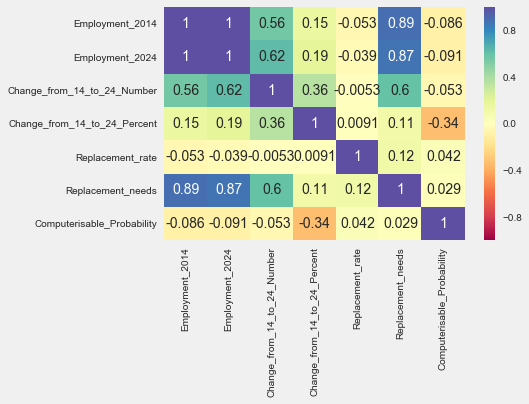

In [11]:
corr_df = df[['Employment_2014', 'Employment_2024', 'Change_from_14_to_24_Number', 
             'Change_from_14_to_24_Percent', 'Replacement_rate', 'Replacement_needs', 'Computerisable_Probability']]
corr_df = corr_df.corr()
sns.heatmap(corr_df, annot=True, cmap="Spectral")

### Other ideas I'm considering at this point:


Startup Lyfe

* y_combinator and "startup-success" in DSI-6 datasets


Real estate / Airbnb / Apartment

* Dirty data dough